In [153]:
!pip install yfinance

In [154]:
import project_functions as pf
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [155]:
googl = yf.Ticker('GOOGL')
googl_df = googl.history(period='max')

In [156]:
googl_df = pf.date_time_prep(googl_df)
googl_df = pf.rolling_aves(googl_df)
googl_df = pf.future_close_setup(googl_df)
googl_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Day,Month,Year,Days From IPO,5 Day Open Mean,5 Day High Mean,5 Day Low Mean,5 Day Close Mean,5 Day Volume Mean,5 Day Open Var,5 Day High Var,5 Day Low Var,5 Day Close Var,5 Day Volume Var,10 Day Open Mean,10 Day High Mean,10 Day Low Mean,10 Day Close Mean,10 Day Volume Mean,10 Day Open Var,10 Day High Var,10 Day Low Var,10 Day Close Var,10 Day Volume Var,20 Day Open Mean,20 Day High Mean,20 Day Low Mean,20 Day Close Mean,20 Day Volume Mean,20 Day Open Var,20 Day High Var,20 Day Low Var,20 Day Close Var,20 Day Volume Var,Close in 1 Days
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,44659096,0,0.0,19,8,2004,0,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,54.209209
2004-08-20,50.555557,54.594597,50.300301,54.209209,22834343,0,0.0,20,8,2004,1,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,54.754753
2004-08-23,55.430431,56.796799,54.579578,54.754753,18256126,0,0.0,23,8,2004,4,50.302803,53.338339,49.164164,52.214714,3.374672e+07,0.063885,1.578184,1.290807,3.978012,1.190800e+14,50.302803,53.338339,49.164164,52.214714,3.374672e+07,0.063885,1.578184,1.290807,3.978012,1.190800e+14,50.302803,53.338339,49.164164,52.214714,3.374672e+07,0.063885,1.578184,1.290807,3.978012,1.190800e+14,52.487488
2004-08-24,55.675674,55.855858,51.836838,52.487488,15247337,0,0.0,24,8,2004,5,52.012012,54.491159,50.969302,53.061394,2.858319e+07,5.885384,3.710110,7.377587,4.085741,1.327107e+14,52.012012,54.491159,50.969302,53.061394,2.858319e+07,5.885384,3.710110,7.377587,4.085741,1.327107e+14,52.012012,54.491159,50.969302,53.061394,2.858319e+07,5.885384,3.710110,7.377587,4.085741,1.327107e+14,53.053055
2004-08-25,52.532532,54.054054,51.991993,53.053055,9188602,0,0.0,25,8,2004,6,52.848849,54.676678,51.347347,52.944945,2.203710e+07,6.962009,3.252927,5.804171,3.129715,1.844677e+14,52.927928,54.832334,51.186186,52.917917,2.524923e+07,6.930741,3.131784,5.674306,3.126062,1.328790e+14,52.927928,54.832334,51.186186,52.917917,2.524923e+07,6.930741,3.131784,5.674306,3.126062,1.328790e+14,54.009010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-08,2100.000000,2115.000000,2063.350098,2084.520020,1441400,0,0.0,8,2,2021,6017,2039.784058,2067.246021,2013.674023,2040.995972,2.714320e+06,5289.856308,4638.269884,3940.132553,4878.912033,2.078788e+12,1946.943030,1978.352014,1921.893018,1950.549963,2.627200e+06,12203.475007,11198.457820,11579.918783,11945.639675,1.363051e+12,1873.212012,1903.460504,1850.998004,1877.026990,2.304030e+06,14146.958495,13942.800340,13113.633796,13963.644669,9.791607e+11,2075.389893
2021-02-09,2074.800049,2098.510010,2070.000000,2075.389893,1094600,0,0.0,9,2,2021,6018,2072.118066,2097.074023,2046.400024,2072.249951,2.269920e+06,279.213794,296.802601,516.008914,240.195023,2.397112e+12,1965.824036,1996.628015,1941.280017,1967.293958,2.579350e+06,13210.943948,11996.103333,13366.904051,13164.154506,1.498033e+12,1888.101013,1919.167004,1866.891003,1892.981982,2.271730e+06,15565.442182,14939.129884,14857.698195,14999.391728,1.038340e+12,2086.479980
2021-02-10,2083.139893,2098.879883,2052.239990,2086.479980,1255100,0,0.0,10,2,2021,6019,2075.624023,2095.525977,2054.138013,2077.769971,1.542120e+06,283.630906,271.840346,179.909411,208.040505,2.708807e+11,1986.647021,2018.469006,1966.776013,1994.047961,2.292300e+06,13340.0203

In [157]:
# This is a linear regression model that only uses closing price history
def multi_linear_regressor(stock_df):
    
    X = stock_df.iloc[:,:-1]
    y = stock_df.iloc[:,-1:]
    #X = stock_df['Days From IPO'].values.reshape(-1, 1)
    #y = stock_df['Close'].values.reshape(-1, 1)
    
    # Does train/Test Split on chosen time
    # Change the -50 to a differnt value to change split point
    split_mark = int(len(stock_df)-50)
    X_train = X.head(split_mark)
    X_test = X.tail(len(stock_df) - split_mark)
    y_train = y.head(split_mark)
    y_test = y.tail(len(stock_df) - split_mark)
    
    stock_model = LinearRegression().fit(X_train, y_train)
    stock_close_pred = stock_model.predict(X_test)
    stock_train_pred = stock_model.predict(X_train)

    sell_line = stock_close_pred*1.1
    buy_line = stock_close_pred*0.9
    
    #results_df = pd.dataFrame()
    # Plots Results
    # If you want to graph all the training values then get rid of the .tail() in all 4 terms below
    plt.plot(X_train.tail(50).index, y_train.tail(50), color = 'blue', label='Stock Price')
    plt.plot(X_train.tail(50).index, stock_train_pred[-50:], color='black', label='Predicted Price')
    # Changing for viewing full training plot happens above
    plt.title('Multi Linear Regressor Training Predictions')
    plt.show()
    print()

    plt.plot(stock_df.tail(len(stock_df)-split_mark).index, y_test, color = 'blue', label='Stock Price')
    plt.plot(stock_df.tail(len(stock_df)-split_mark).index, stock_close_pred, color='black', label='Predicted Price')
    #plt.plot(stock_df.tail(len(stock_df)-split_mark).index, sell_line, color= 'red', label='Sell Line')
    #plt.plot(stock_df.tail(len(stock_df)-split_mark).index, buy_line, color='green', label='Buy Line')
    plt.title("Multi Linear Regressor Model")
    plt.legend
    plt.show()
    model_score = r2_score(y_test.dropna(), stock_close_pred[:len(y_test.dropna())])
    print()
    print("R2 Score: " + str(model_score))
    
    return stock_df

In [174]:
def multi_poly_regressor(stock_df, degree=2):
    polynomial_features= PolynomialFeatures(degree=degree)
    X = stock_df.iloc[:,:-1]
    y = stock_df.iloc[:,-1:]

    # Transforms x values to polynomial values
    x_poly = polynomial_features.fit_transform(X)
    
    # Does train/Test Split on chosen time
    # Change the -50 to a differnt value to change split point
    split_mark = int(len(stock_df)-50)
    X_train = x_poly[:split_mark,:]
    X_test = x_poly[split_mark:,:]
    y_train = y.head(split_mark)
    y_test = y.tail(len(stock_df) - split_mark)
    
    
    stock_poly_model = LinearRegression().fit(X_train, y_train)
    stock_poly_pred = stock_poly_model.predict(X_test)
    stock_train_pred = stock_poly_model.predict(X_train)

    sell_line = stock_poly_pred*1.1
    buy_line = stock_poly_pred*0.9
    
    # Plots Results
    # If you want to graph all the training values then get rid of the .tail() in all 4 terms below
    plt.plot(y_train.tail(50).index, y_train.tail(50), color = 'blue', label='Stock Price')
    plt.plot(y_train.tail(50).index, stock_train_pred[-50:], color='black', label='Predicted Price')
    # Changing for viewing full training plot happens above
    plt.title('Multi Poly Regressor Training Predictions')
    plt.show()
    print()

    plt.plot(stock_df.tail(len(stock_df)-split_mark).index, y_test, color = 'blue', label='Stock Price')
    plt.plot(stock_df.tail(len(stock_df)-split_mark).index, stock_poly_pred, color='black', label='Predicted Price')
    #plt.plot(stock_df.tail(len(stock_df)-split_mark).index, sell_line, color= 'red', label='Sell Line')
    #plt.plot(stock_df.tail(len(stock_df)-split_mark).index, buy_line, color='green', label='Buy Line')
    plt.title("Multi Poly Regressor Model")
    plt.legend
    plt.show()

    model_score = r2_score(y_test.dropna(), stock_poly_pred[:len(y_test.dropna())])
    print()
    print("R2 Score: " + str(model_score))
    
    return stock_df

In [179]:
def neural_net(stock_df):
    scaler = MinMaxScaler()
    X = stock_df.iloc[:,:-1]
    y = stock_df.iloc[:,-1:]
    #X = stock_df['Days From IPO'].values.reshape(-1, 1)
    #y = stock_df['Close'].values.reshape(-1, 1)
    
    # Does train/Test Split on last year
    # Change the -50 to a differnt value to change split point
    split_mark = int(len(stock_df)-50)
    X_train = X.head(split_mark)
    X_test = X.tail(len(stock_df) - split_mark)
    y_train = y.head(split_mark)
    y_test = y.tail(len(stock_df) - split_mark)

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    stock_nn = MLPRegressor(hidden_layer_sizes = [500], max_iter=1000,
                             shuffle=True, random_state=45).fit(X_train_scaled, y_train)
    
    stock_nn_pred = stock_nn.predict(X_test_scaled)
    stock_nn_train_pred = stock_nn.predict(X_train_scaled)
    
    sell_line = stock_nn_pred*1.1
    buy_line = stock_nn_pred*0.9
    
    #predict_series = pd.Series(stock_nn_pred)
    #results_df = pd.concat([y_test, predict_series], axis=1)
    # Plots Results
    plt.plot(X_train.tail(50).index, y_train.tail(50), color = 'blue', label='Stock Price')
    plt.plot(X_train.tail(50).index, stock_nn_train_pred[-50:], color='black', label='Predicted Price')
    # Changing for viewing full training plot happens above
    plt.title('Neural Net Training Predictions')
    plt.show()
    print()

    plt.plot(stock_df.tail(len(stock_df)-split_mark).index, y_test, color = 'blue', label='Stock Price')
    plt.plot(stock_df.tail(len(stock_df)-split_mark).index, stock_nn_pred, color='black', label='Predicted Price')
    #plt.plot(stock_df.tail(len(stock_df)-split_mark).index, sell_line, color= 'red', label='Sell Line')
    #plt.plot(stock_df.tail(len(stock_df)-split_mark).index, buy_line, color='green', label='Buy Line')
    
    plt.title('Neural Net Predictor')
    plt.show()
    model_score = r2_score(y_test.dropna(), stock_nn_pred[:len(y_test.dropna())])
    print()
    print("R2 Score: " + str(model_score))
    
    return stock_df


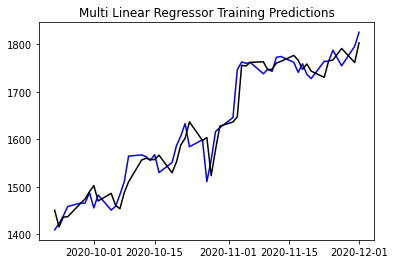

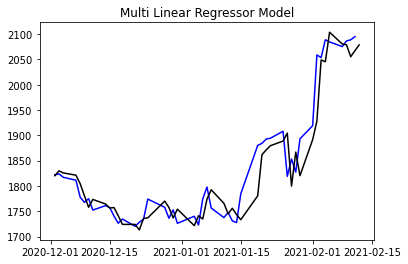


R2 Score: 0.9093436706676574


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Day,Month,Year,Days From IPO,5 Day Open Mean,5 Day High Mean,5 Day Low Mean,5 Day Close Mean,5 Day Volume Mean,5 Day Open Var,5 Day High Var,5 Day Low Var,5 Day Close Var,5 Day Volume Var,10 Day Open Mean,10 Day High Mean,10 Day Low Mean,10 Day Close Mean,10 Day Volume Mean,10 Day Open Var,10 Day High Var,10 Day Low Var,10 Day Close Var,10 Day Volume Var,20 Day Open Mean,20 Day High Mean,20 Day Low Mean,20 Day Close Mean,20 Day Volume Mean,20 Day Open Var,20 Day High Var,20 Day Low Var,20 Day Close Var,20 Day Volume Var,Close in 1 Days
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,44659096,0,0.0,19,8,2004,0,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,54.209209
2004-08-20,50.555557,54.594597,50.300301,54.209209,22834343,0,0.0,20,8,2004,1,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,54.754753
2004-08-23,55.430431,56.796799,54.579578,54.754753,18256126,0,0.0,23,8,2004,4,50.302803,53.338339,49.164164,52.214714,3.374672e+07,0.063885,1.578184,1.290807,3.978012,1.190800e+14,50.302803,53.338339,49.164164,52.214714,3.374672e+07,0.063885,1.578184,1.290807,3.978012,1.190800e+14,50.302803,53.338339,49.164164,52.214714,3.374672e+07,0.063885,1.578184,1.290807,3.978012,1.190800e+14,52.487488
2004-08-24,55.675674,55.855858,51.836838,52.487488,15247337,0,0.0,24,8,2004,5,52.012012,54.491159,50.969302,53.061394,2.858319e+07,5.885384,3.710110,7.377587,4.085741,1.327107e+14,52.012012,54.491159,50.969302,53.061394,2.858319e+07,5.885384,3.710110,7.377587,4.085741,1.327107e+14,52.012012,54.491159,50.969302,53.061394,2.858319e+07,5.885384,3.710110,7.377587,4.085741,1.327107e+14,53.053055
2004-08-25,52.532532,54.054054,51.991993,53.053055,9188602,0,0.0,25,8,2004,6,52.848849,54.676678,51.347347,52.944945,2.203710e+07,6.962009,3.252927,5.804171,3.129715,1.844677e+14,52.927928,54.832334,51.186186,52.917917,2.524923e+07,6.930741,3.131784,5.674306,3.126062,1.328790e+14,52.927928,54.832334,51.186186,52.917917,2.524923e+07,6.930741,3.131784,5.674306,3.126062,1.328790e+14,54.009010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-08,2100.000000,2115.000000,2063.350098,2084.520020,1441400,0,0.0,8,2,2021,6017,2039.784058,2067.246021,2013.674023,2040.995972,2.714320e+06,5289.856308,4638.269884,3940.132553,4878.912033,2.078788e+12,1946.943030,1978.352014,1921.893018,1950.549963,2.627200e+06,12203.475007,11198.457820,11579.918783,11945.639675,1.363051e+12,1873.212012,1903.460504,1850.998004,1877.026990,2.304030e+06,14146.958495,13942.800340,13113.633796,13963.644669,9.791607e+11,2075.389893
2021-02-09,2074.800049,2098.510010,2070.000000,2075.389893,1094600,0,0.0,9,2,2021,6018,2072.118066,2097.074023,2046.400024,2072.249951,2.269920e+06,279.213794,296.802601,516.008914,240.195023,2.397112e+12,1965.824036,1996.628015,1941.280017,1967.293958,2.579350e+06,13210.943948,11996.103333,13366.904051,13164.154506,1.498033e+12,1888.101013,1919.167004,1866.891003,1892.981982,2.271730e+06,15565.442182,14939.129884,14857.698195,14999.391728,1.038340e+12,2086.479980
2021-02-10,2083.139893,2098.879883,2052.239990,2086.479980,1255100,0,0.0,10,2,2021,6019,2075.624023,2095.525977,2054.138013,2077.769971,1.542120e+06,283.630906,271.840346,179.909411,208.040505,2.708807e+11,1986.647021,2018.469006,1966.776013,1994.047961,2.292300e+06,13340.0203

In [160]:
googl_df = googl.history(period='max')
googl_df = pf.date_time_prep(googl_df)
googl_df = pf.rolling_aves(googl_df)
googl_df = pf.future_close_setup(googl_df)
multi_linear_regressor(googl_df)

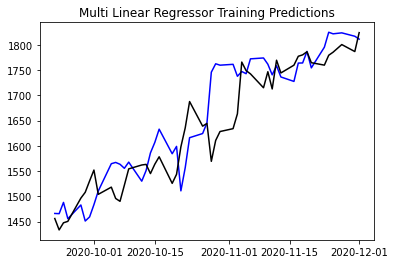

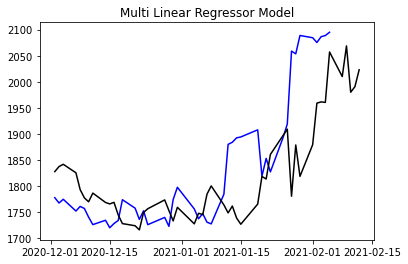


R2 Score: 0.40535171964499284


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Day,Month,Year,Days From IPO,5 Day Open Mean,5 Day High Mean,5 Day Low Mean,5 Day Close Mean,5 Day Volume Mean,5 Day Open Var,5 Day High Var,5 Day Low Var,5 Day Close Var,5 Day Volume Var,10 Day Open Mean,10 Day High Mean,10 Day Low Mean,10 Day Close Mean,10 Day Volume Mean,10 Day Open Var,10 Day High Var,10 Day Low Var,10 Day Close Var,10 Day Volume Var,20 Day Open Mean,20 Day High Mean,20 Day Low Mean,20 Day Close Mean,20 Day Volume Mean,20 Day Open Var,20 Day High Var,20 Day Low Var,20 Day Close Var,20 Day Volume Var,Close in 5 Days
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,44659096,0,0.0,19,8,2004,0,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,54.009010
2004-08-20,50.555557,54.594597,50.300301,54.209209,22834343,0,0.0,20,8,2004,1,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,53.128128
2004-08-23,55.430431,56.796799,54.579578,54.754753,18256126,0,0.0,23,8,2004,4,50.302803,53.338339,49.164164,52.214714,3.374672e+07,0.063885,1.578184,1.290807,3.978012,1.190800e+14,50.302803,53.338339,49.164164,52.214714,3.374672e+07,0.063885,1.578184,1.290807,3.978012,1.190800e+14,50.302803,53.338339,49.164164,52.214714,3.374672e+07,0.063885,1.578184,1.290807,3.978012,1.190800e+14,51.056057
2004-08-24,55.675674,55.855858,51.836838,52.487488,15247337,0,0.0,24,8,2004,5,52.012012,54.491159,50.969302,53.061394,2.858319e+07,5.885384,3.710110,7.377587,4.085741,1.327107e+14,52.012012,54.491159,50.969302,53.061394,2.858319e+07,5.885384,3.710110,7.377587,4.085741,1.327107e+14,52.012012,54.491159,50.969302,53.061394,2.858319e+07,5.885384,3.710110,7.377587,4.085741,1.327107e+14,51.236237
2004-08-25,52.532532,54.054054,51.991993,53.053055,9188602,0,0.0,25,8,2004,6,52.848849,54.676678,51.347347,52.944945,2.203710e+07,6.962009,3.252927,5.804171,3.129715,1.844677e+14,52.927928,54.832334,51.186186,52.917917,2.524923e+07,6.930741,3.131784,5.674306,3.126062,1.328790e+14,52.927928,54.832334,51.186186,52.917917,2.524923e+07,6.930741,3.131784,5.674306,3.126062,1.328790e+14,50.175175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-08,2100.000000,2115.000000,2063.350098,2084.520020,1441400,0,0.0,8,2,2021,6017,2039.784058,2067.246021,2013.674023,2040.995972,2.714320e+06,5289.856308,4638.269884,3940.132553,4878.912033,2.078788e+12,1946.943030,1978.352014,1921.893018,1950.549963,2.627200e+06,12203.475007,11198.457820,11579.918783,11945.639675,1.363051e+12,1873.212012,1903.460504,1850.998004,1877.026990,2.304030e+06,14146.958495,13942.800340,13113.633796,13963.644669,9.791607e+11,NaN
2021-02-09,2074.800049,2098.510010,2070.000000,2075.389893,1094600,0,0.0,9,2,2021,6018,2072.118066,2097.074023,2046.400024,2072.249951,2.269920e+06,279.213794,296.802601,516.008914,240.195023,2.397112e+12,1965.824036,1996.628015,1941.280017,1967.293958,2.579350e+06,13210.943948,11996.103333,13366.904051,13164.154506,1.498033e+12,1888.101013,1919.167004,1866.891003,1892.981982,2.271730e+06,15565.442182,14939.129884,14857.698195,14999.391728,1.038340e+12,NaN
2021-02-10,2083.139893,2098.879883,2052.239990,2086.479980,1255100,0,0.0,10,2,2021,6019,2075.624023,2095.525977,2054.138013,2077.769971,1.542120e+06,283.630906,271.840346,179.909411,208.040505,2.708807e+11,1986.647021,2018.469006,1966.776013,1994.047961,2.292300e+06,13340.020307,11128.599353,

In [161]:
googl_df = googl.history(period='max')
googl_df = pf.date_time_prep(googl_df)
googl_df = pf.rolling_aves(googl_df)
googl_df = pf.future_close_setup(googl_df, 5)
multi_linear_regressor(googl_df)

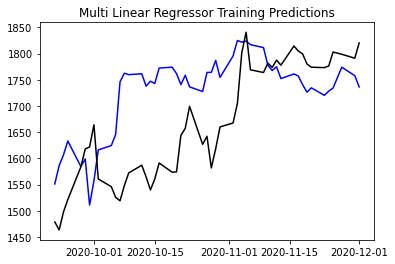

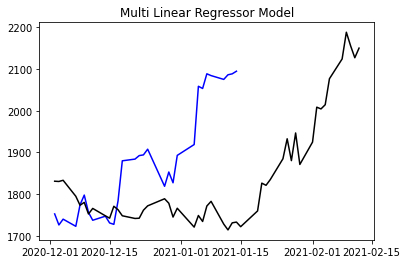


R2 Score: -1.057246679488728


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Day,Month,Year,Days From IPO,5 Day Open Mean,5 Day High Mean,5 Day Low Mean,5 Day Close Mean,5 Day Volume Mean,5 Day Open Var,5 Day High Var,5 Day Low Var,5 Day Close Var,5 Day Volume Var,10 Day Open Mean,10 Day High Mean,10 Day Low Mean,10 Day Close Mean,10 Day Volume Mean,10 Day Open Var,10 Day High Var,10 Day Low Var,10 Day Close Var,10 Day Volume Var,20 Day Open Mean,20 Day High Mean,20 Day Low Mean,20 Day Close Mean,20 Day Volume Mean,20 Day Open Var,20 Day High Var,20 Day Low Var,20 Day Close Var,20 Day Volume Var,Close in 20 Days
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,44659096,0,0.0,19,8,2004,0,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,58.803802
2004-08-20,50.555557,54.594597,50.300301,54.209209,22834343,0,0.0,20,8,2004,1,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,59.739738
2004-08-23,55.430431,56.796799,54.579578,54.754753,18256126,0,0.0,23,8,2004,4,50.302803,53.338339,49.164164,52.214714,3.374672e+07,0.063885,1.578184,1.290807,3.978012,1.190800e+14,50.302803,53.338339,49.164164,52.214714,3.374672e+07,0.063885,1.578184,1.290807,3.978012,1.190800e+14,50.302803,53.338339,49.164164,52.214714,3.374672e+07,0.063885,1.578184,1.290807,3.978012,1.190800e+14,58.978977
2004-08-24,55.675674,55.855858,51.836838,52.487488,15247337,0,0.0,24,8,2004,5,52.012012,54.491159,50.969302,53.061394,2.858319e+07,5.885384,3.710110,7.377587,4.085741,1.327107e+14,52.012012,54.491159,50.969302,53.061394,2.858319e+07,5.885384,3.710110,7.377587,4.085741,1.327107e+14,52.012012,54.491159,50.969302,53.061394,2.858319e+07,5.885384,3.710110,7.377587,4.085741,1.327107e+14,59.249249
2004-08-25,52.532532,54.054054,51.991993,53.053055,9188602,0,0.0,25,8,2004,6,52.848849,54.676678,51.347347,52.944945,2.203710e+07,6.962009,3.252927,5.804171,3.129715,1.844677e+14,52.927928,54.832334,51.186186,52.917917,2.524923e+07,6.930741,3.131784,5.674306,3.126062,1.328790e+14,52.927928,54.832334,51.186186,52.917917,2.524923e+07,6.930741,3.131784,5.674306,3.126062,1.328790e+14,60.470470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-08,2100.000000,2115.000000,2063.350098,2084.520020,1441400,0,0.0,8,2,2021,6017,2039.784058,2067.246021,2013.674023,2040.995972,2.714320e+06,5289.856308,4638.269884,3940.132553,4878.912033,2.078788e+12,1946.943030,1978.352014,1921.893018,1950.549963,2.627200e+06,12203.475007,11198.457820,11579.918783,11945.639675,1.363051e+12,1873.212012,1903.460504,1850.998004,1877.026990,2.304030e+06,14146.958495,13942.800340,13113.633796,13963.644669,9.791607e+11,NaN
2021-02-09,2074.800049,2098.510010,2070.000000,2075.389893,1094600,0,0.0,9,2,2021,6018,2072.118066,2097.074023,2046.400024,2072.249951,2.269920e+06,279.213794,296.802601,516.008914,240.195023,2.397112e+12,1965.824036,1996.628015,1941.280017,1967.293958,2.579350e+06,13210.943948,11996.103333,13366.904051,13164.154506,1.498033e+12,1888.101013,1919.167004,1866.891003,1892.981982,2.271730e+06,15565.442182,14939.129884,14857.698195,14999.391728,1.038340e+12,NaN
2021-02-10,2083.139893,2098.879883,2052.239990,2086.479980,1255100,0,0.0,10,2,2021,6019,2075.624023,2095.525977,2054.138013,2077.769971,1.542120e+06,283.630906,271.840346,179.909411,208.040505,2.708807e+11,1986.647021,2018.469006,1966.776013,1994.047961,2.292300e+06,13340.020307,11128.599353

In [162]:
googl_df = googl.history(period='max')
googl_df = pf.date_time_prep(googl_df)
googl_df = pf.rolling_aves(googl_df)
googl_df = pf.future_close_setup(googl_df, 20)
multi_linear_regressor(googl_df)

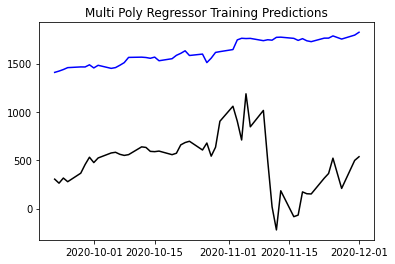

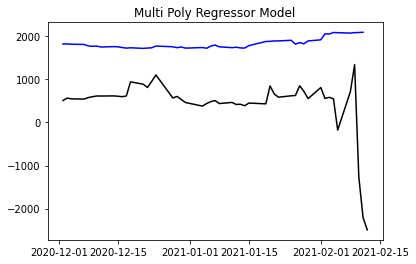


R2 Score: -141.8044066681842


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Day,Month,Year,Days From IPO,5 Day Open Mean,5 Day High Mean,5 Day Low Mean,5 Day Close Mean,5 Day Volume Mean,5 Day Open Var,5 Day High Var,5 Day Low Var,5 Day Close Var,5 Day Volume Var,10 Day Open Mean,10 Day High Mean,10 Day Low Mean,10 Day Close Mean,10 Day Volume Mean,10 Day Open Var,10 Day High Var,10 Day Low Var,10 Day Close Var,10 Day Volume Var,20 Day Open Mean,20 Day High Mean,20 Day Low Mean,20 Day Close Mean,20 Day Volume Mean,20 Day Open Var,20 Day High Var,20 Day Low Var,20 Day Close Var,20 Day Volume Var,Close in 1 Days
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,44659096,0,0.0,19,8,2004,0,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,54.209209
2004-08-20,50.555557,54.594597,50.300301,54.209209,22834343,0,0.0,20,8,2004,1,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,54.754753
2004-08-23,55.430431,56.796799,54.579578,54.754753,18256126,0,0.0,23,8,2004,4,50.302803,53.338339,49.164164,52.214714,3.374672e+07,0.063885,1.578184,1.290807,3.978012,1.190800e+14,50.302803,53.338339,49.164164,52.214714,3.374672e+07,0.063885,1.578184,1.290807,3.978012,1.190800e+14,50.302803,53.338339,49.164164,52.214714,3.374672e+07,0.063885,1.578184,1.290807,3.978012,1.190800e+14,52.487488
2004-08-24,55.675674,55.855858,51.836838,52.487488,15247337,0,0.0,24,8,2004,5,52.012012,54.491159,50.969302,53.061394,2.858319e+07,5.885384,3.710110,7.377587,4.085741,1.327107e+14,52.012012,54.491159,50.969302,53.061394,2.858319e+07,5.885384,3.710110,7.377587,4.085741,1.327107e+14,52.012012,54.491159,50.969302,53.061394,2.858319e+07,5.885384,3.710110,7.377587,4.085741,1.327107e+14,53.053055
2004-08-25,52.532532,54.054054,51.991993,53.053055,9188602,0,0.0,25,8,2004,6,52.848849,54.676678,51.347347,52.944945,2.203710e+07,6.962009,3.252927,5.804171,3.129715,1.844677e+14,52.927928,54.832334,51.186186,52.917917,2.524923e+07,6.930741,3.131784,5.674306,3.126062,1.328790e+14,52.927928,54.832334,51.186186,52.917917,2.524923e+07,6.930741,3.131784,5.674306,3.126062,1.328790e+14,54.009010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-08,2100.000000,2115.000000,2063.350098,2084.520020,1441400,0,0.0,8,2,2021,6017,2039.784058,2067.246021,2013.674023,2040.995972,2.714320e+06,5289.856308,4638.269884,3940.132553,4878.912033,2.078788e+12,1946.943030,1978.352014,1921.893018,1950.549963,2.627200e+06,12203.475007,11198.457820,11579.918783,11945.639675,1.363051e+12,1873.212012,1903.460504,1850.998004,1877.026990,2.304030e+06,14146.958495,13942.800340,13113.633796,13963.644669,9.791607e+11,2075.389893
2021-02-09,2074.800049,2098.510010,2070.000000,2075.389893,1094600,0,0.0,9,2,2021,6018,2072.118066,2097.074023,2046.400024,2072.249951,2.269920e+06,279.213794,296.802601,516.008914,240.195023,2.397112e+12,1965.824036,1996.628015,1941.280017,1967.293958,2.579350e+06,13210.943948,11996.103333,13366.904051,13164.154506,1.498033e+12,1888.101013,1919.167004,1866.891003,1892.981982,2.271730e+06,15565.442182,14939.129884,14857.698195,14999.391728,1.038340e+12,2086.479980
2021-02-10,2083.139893,2098.879883,2052.239990,2086.479980,1255100,0,0.0,10,2,2021,6019,2075.624023,2095.525977,2054.138013,2077.769971,1.542120e+06,283.630906,271.840346,179.909411,208.040505,2.708807e+11,1986.647021,2018.469006,1966.776013,1994.047961,2.292300e+06,13340.0203

In [175]:
googl_df = googl.history(period='max')
googl_df = pf.date_time_prep(googl_df)
googl_df = pf.rolling_aves(googl_df)
googl_df = pf.future_close_setup(googl_df, 1)
multi_poly_regressor(googl_df)

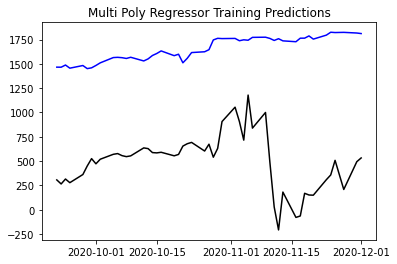

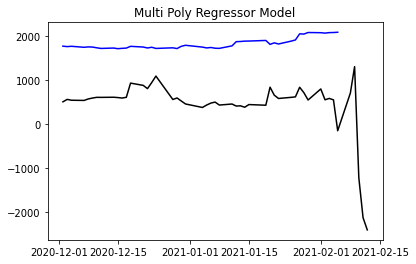


R2 Score: -101.57445276281398


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Day,Month,Year,Days From IPO,5 Day Open Mean,5 Day High Mean,5 Day Low Mean,5 Day Close Mean,5 Day Volume Mean,5 Day Open Var,5 Day High Var,5 Day Low Var,5 Day Close Var,5 Day Volume Var,10 Day Open Mean,10 Day High Mean,10 Day Low Mean,10 Day Close Mean,10 Day Volume Mean,10 Day Open Var,10 Day High Var,10 Day Low Var,10 Day Close Var,10 Day Volume Var,20 Day Open Mean,20 Day High Mean,20 Day Low Mean,20 Day Close Mean,20 Day Volume Mean,20 Day Open Var,20 Day High Var,20 Day Low Var,20 Day Close Var,20 Day Volume Var,Close in 5 Days
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,44659096,0,0.0,19,8,2004,0,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,54.009010
2004-08-20,50.555557,54.594597,50.300301,54.209209,22834343,0,0.0,20,8,2004,1,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,53.128128
2004-08-23,55.430431,56.796799,54.579578,54.754753,18256126,0,0.0,23,8,2004,4,50.302803,53.338339,49.164164,52.214714,3.374672e+07,0.063885,1.578184,1.290807,3.978012,1.190800e+14,50.302803,53.338339,49.164164,52.214714,3.374672e+07,0.063885,1.578184,1.290807,3.978012,1.190800e+14,50.302803,53.338339,49.164164,52.214714,3.374672e+07,0.063885,1.578184,1.290807,3.978012,1.190800e+14,51.056057
2004-08-24,55.675674,55.855858,51.836838,52.487488,15247337,0,0.0,24,8,2004,5,52.012012,54.491159,50.969302,53.061394,2.858319e+07,5.885384,3.710110,7.377587,4.085741,1.327107e+14,52.012012,54.491159,50.969302,53.061394,2.858319e+07,5.885384,3.710110,7.377587,4.085741,1.327107e+14,52.012012,54.491159,50.969302,53.061394,2.858319e+07,5.885384,3.710110,7.377587,4.085741,1.327107e+14,51.236237
2004-08-25,52.532532,54.054054,51.991993,53.053055,9188602,0,0.0,25,8,2004,6,52.848849,54.676678,51.347347,52.944945,2.203710e+07,6.962009,3.252927,5.804171,3.129715,1.844677e+14,52.927928,54.832334,51.186186,52.917917,2.524923e+07,6.930741,3.131784,5.674306,3.126062,1.328790e+14,52.927928,54.832334,51.186186,52.917917,2.524923e+07,6.930741,3.131784,5.674306,3.126062,1.328790e+14,50.175175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-08,2100.000000,2115.000000,2063.350098,2084.520020,1441400,0,0.0,8,2,2021,6017,2039.784058,2067.246021,2013.674023,2040.995972,2.714320e+06,5289.856308,4638.269884,3940.132553,4878.912033,2.078788e+12,1946.943030,1978.352014,1921.893018,1950.549963,2.627200e+06,12203.475007,11198.457820,11579.918783,11945.639675,1.363051e+12,1873.212012,1903.460504,1850.998004,1877.026990,2.304030e+06,14146.958495,13942.800340,13113.633796,13963.644669,9.791607e+11,NaN
2021-02-09,2074.800049,2098.510010,2070.000000,2075.389893,1094600,0,0.0,9,2,2021,6018,2072.118066,2097.074023,2046.400024,2072.249951,2.269920e+06,279.213794,296.802601,516.008914,240.195023,2.397112e+12,1965.824036,1996.628015,1941.280017,1967.293958,2.579350e+06,13210.943948,11996.103333,13366.904051,13164.154506,1.498033e+12,1888.101013,1919.167004,1866.891003,1892.981982,2.271730e+06,15565.442182,14939.129884,14857.698195,14999.391728,1.038340e+12,NaN
2021-02-10,2083.139893,2098.879883,2052.239990,2086.479980,1255100,0,0.0,10,2,2021,6019,2075.624023,2095.525977,2054.138013,2077.769971,1.542120e+06,283.630906,271.840346,179.909411,208.040505,2.708807e+11,1986.647021,2018.469006,1966.776013,1994.047961,2.292300e+06,13340.020307,11128.599353,

In [176]:
googl_df = googl.history(period='max')
googl_df = pf.date_time_prep(googl_df)
googl_df = pf.rolling_aves(googl_df)
googl_df = pf.future_close_setup(googl_df, 5)
multi_poly_regressor(googl_df)

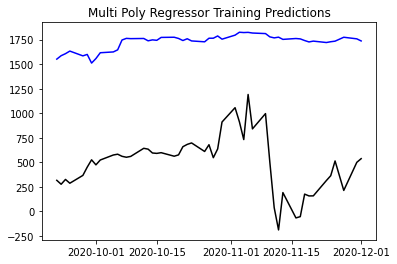

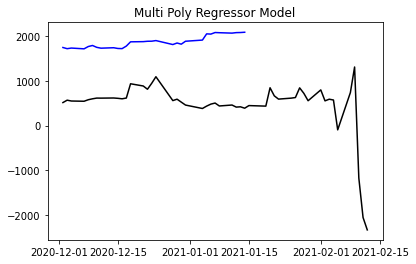


R2 Score: -94.62171184994857


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Day,Month,Year,Days From IPO,5 Day Open Mean,5 Day High Mean,5 Day Low Mean,5 Day Close Mean,5 Day Volume Mean,5 Day Open Var,5 Day High Var,5 Day Low Var,5 Day Close Var,5 Day Volume Var,10 Day Open Mean,10 Day High Mean,10 Day Low Mean,10 Day Close Mean,10 Day Volume Mean,10 Day Open Var,10 Day High Var,10 Day Low Var,10 Day Close Var,10 Day Volume Var,20 Day Open Mean,20 Day High Mean,20 Day Low Mean,20 Day Close Mean,20 Day Volume Mean,20 Day Open Var,20 Day High Var,20 Day Low Var,20 Day Close Var,20 Day Volume Var,Close in 20 Days
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,44659096,0,0.0,19,8,2004,0,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,58.803802
2004-08-20,50.555557,54.594597,50.300301,54.209209,22834343,0,0.0,20,8,2004,1,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,59.739738
2004-08-23,55.430431,56.796799,54.579578,54.754753,18256126,0,0.0,23,8,2004,4,50.302803,53.338339,49.164164,52.214714,3.374672e+07,0.063885,1.578184,1.290807,3.978012,1.190800e+14,50.302803,53.338339,49.164164,52.214714,3.374672e+07,0.063885,1.578184,1.290807,3.978012,1.190800e+14,50.302803,53.338339,49.164164,52.214714,3.374672e+07,0.063885,1.578184,1.290807,3.978012,1.190800e+14,58.978977
2004-08-24,55.675674,55.855858,51.836838,52.487488,15247337,0,0.0,24,8,2004,5,52.012012,54.491159,50.969302,53.061394,2.858319e+07,5.885384,3.710110,7.377587,4.085741,1.327107e+14,52.012012,54.491159,50.969302,53.061394,2.858319e+07,5.885384,3.710110,7.377587,4.085741,1.327107e+14,52.012012,54.491159,50.969302,53.061394,2.858319e+07,5.885384,3.710110,7.377587,4.085741,1.327107e+14,59.249249
2004-08-25,52.532532,54.054054,51.991993,53.053055,9188602,0,0.0,25,8,2004,6,52.848849,54.676678,51.347347,52.944945,2.203710e+07,6.962009,3.252927,5.804171,3.129715,1.844677e+14,52.927928,54.832334,51.186186,52.917917,2.524923e+07,6.930741,3.131784,5.674306,3.126062,1.328790e+14,52.927928,54.832334,51.186186,52.917917,2.524923e+07,6.930741,3.131784,5.674306,3.126062,1.328790e+14,60.470470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-08,2100.000000,2115.000000,2063.350098,2084.520020,1441400,0,0.0,8,2,2021,6017,2039.784058,2067.246021,2013.674023,2040.995972,2.714320e+06,5289.856308,4638.269884,3940.132553,4878.912033,2.078788e+12,1946.943030,1978.352014,1921.893018,1950.549963,2.627200e+06,12203.475007,11198.457820,11579.918783,11945.639675,1.363051e+12,1873.212012,1903.460504,1850.998004,1877.026990,2.304030e+06,14146.958495,13942.800340,13113.633796,13963.644669,9.791607e+11,NaN
2021-02-09,2074.800049,2098.510010,2070.000000,2075.389893,1094600,0,0.0,9,2,2021,6018,2072.118066,2097.074023,2046.400024,2072.249951,2.269920e+06,279.213794,296.802601,516.008914,240.195023,2.397112e+12,1965.824036,1996.628015,1941.280017,1967.293958,2.579350e+06,13210.943948,11996.103333,13366.904051,13164.154506,1.498033e+12,1888.101013,1919.167004,1866.891003,1892.981982,2.271730e+06,15565.442182,14939.129884,14857.698195,14999.391728,1.038340e+12,NaN
2021-02-10,2083.139893,2098.879883,2052.239990,2086.479980,1255100,0,0.0,10,2,2021,6019,2075.624023,2095.525977,2054.138013,2077.769971,1.542120e+06,283.630906,271.840346,179.909411,208.040505,2.708807e+11,1986.647021,2018.469006,1966.776013,1994.047961,2.292300e+06,13340.020307,11128.599353

In [177]:
googl_df = googl.history(period='max')
googl_df = pf.date_time_prep(googl_df)
googl_df = pf.rolling_aves(googl_df)
googl_df = pf.future_close_setup(googl_df, 20)
multi_poly_regressor(googl_df)

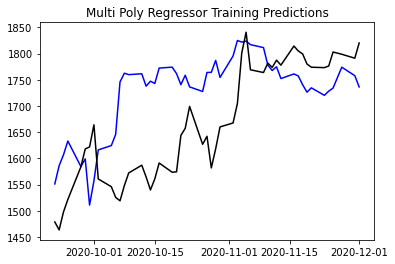

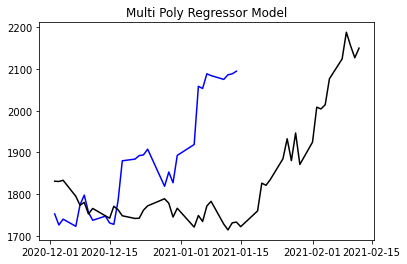


R2 Score: -1.057246679488728


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Day,Month,Year,Days From IPO,5 Day Open Mean,5 Day High Mean,5 Day Low Mean,5 Day Close Mean,5 Day Volume Mean,5 Day Open Var,5 Day High Var,5 Day Low Var,5 Day Close Var,5 Day Volume Var,10 Day Open Mean,10 Day High Mean,10 Day Low Mean,10 Day Close Mean,10 Day Volume Mean,10 Day Open Var,10 Day High Var,10 Day Low Var,10 Day Close Var,10 Day Volume Var,20 Day Open Mean,20 Day High Mean,20 Day Low Mean,20 Day Close Mean,20 Day Volume Mean,20 Day Open Var,20 Day High Var,20 Day Low Var,20 Day Close Var,20 Day Volume Var,Close in 20 Days
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,44659096,0,0.0,19,8,2004,0,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,58.803802
2004-08-20,50.555557,54.594597,50.300301,54.209209,22834343,0,0.0,20,8,2004,1,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,59.739738
2004-08-23,55.430431,56.796799,54.579578,54.754753,18256126,0,0.0,23,8,2004,4,50.302803,53.338339,49.164164,52.214714,3.374672e+07,0.063885,1.578184,1.290807,3.978012,1.190800e+14,50.302803,53.338339,49.164164,52.214714,3.374672e+07,0.063885,1.578184,1.290807,3.978012,1.190800e+14,50.302803,53.338339,49.164164,52.214714,3.374672e+07,0.063885,1.578184,1.290807,3.978012,1.190800e+14,58.978977
2004-08-24,55.675674,55.855858,51.836838,52.487488,15247337,0,0.0,24,8,2004,5,52.012012,54.491159,50.969302,53.061394,2.858319e+07,5.885384,3.710110,7.377587,4.085741,1.327107e+14,52.012012,54.491159,50.969302,53.061394,2.858319e+07,5.885384,3.710110,7.377587,4.085741,1.327107e+14,52.012012,54.491159,50.969302,53.061394,2.858319e+07,5.885384,3.710110,7.377587,4.085741,1.327107e+14,59.249249
2004-08-25,52.532532,54.054054,51.991993,53.053055,9188602,0,0.0,25,8,2004,6,52.848849,54.676678,51.347347,52.944945,2.203710e+07,6.962009,3.252927,5.804171,3.129715,1.844677e+14,52.927928,54.832334,51.186186,52.917917,2.524923e+07,6.930741,3.131784,5.674306,3.126062,1.328790e+14,52.927928,54.832334,51.186186,52.917917,2.524923e+07,6.930741,3.131784,5.674306,3.126062,1.328790e+14,60.470470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-08,2100.000000,2115.000000,2063.350098,2084.520020,1441400,0,0.0,8,2,2021,6017,2039.784058,2067.246021,2013.674023,2040.995972,2.714320e+06,5289.856308,4638.269884,3940.132553,4878.912033,2.078788e+12,1946.943030,1978.352014,1921.893018,1950.549963,2.627200e+06,12203.475007,11198.457820,11579.918783,11945.639675,1.363051e+12,1873.212012,1903.460504,1850.998004,1877.026990,2.304030e+06,14146.958495,13942.800340,13113.633796,13963.644669,9.791607e+11,NaN
2021-02-09,2074.800049,2098.510010,2070.000000,2075.389893,1094600,0,0.0,9,2,2021,6018,2072.118066,2097.074023,2046.400024,2072.249951,2.269920e+06,279.213794,296.802601,516.008914,240.195023,2.397112e+12,1965.824036,1996.628015,1941.280017,1967.293958,2.579350e+06,13210.943948,11996.103333,13366.904051,13164.154506,1.498033e+12,1888.101013,1919.167004,1866.891003,1892.981982,2.271730e+06,15565.442182,14939.129884,14857.698195,14999.391728,1.038340e+12,NaN
2021-02-10,2083.139893,2098.879883,2052.239990,2086.479980,1255100,0,0.0,10,2,2021,6019,2075.624023,2095.525977,2054.138013,2077.769971,1.542120e+06,283.630906,271.840346,179.909411,208.040505,2.708807e+11,1986.647021,2018.469006,1966.776013,1994.047961,2.292300e+06,13340.020307,11128.599353

In [166]:
googl_df = googl.history(period='max')
googl_df = pf.date_time_prep(googl_df)
googl_df = pf.rolling_aves(googl_df)
googl_df = pf.future_close_setup(googl_df, 20)
multi_poly_regressor(googl_df, 3)

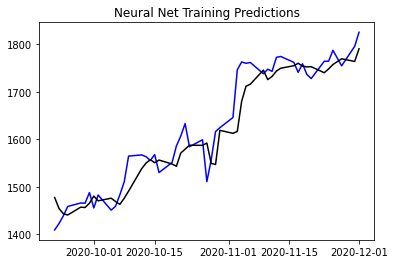

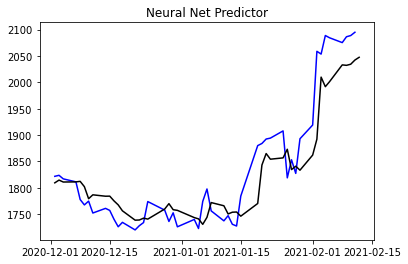


R2 Score: 0.8508685314275578


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Day,Month,Year,Days From IPO,5 Day Open Mean,5 Day High Mean,5 Day Low Mean,5 Day Close Mean,5 Day Volume Mean,5 Day Open Var,5 Day High Var,5 Day Low Var,5 Day Close Var,5 Day Volume Var,10 Day Open Mean,10 Day High Mean,10 Day Low Mean,10 Day Close Mean,10 Day Volume Mean,10 Day Open Var,10 Day High Var,10 Day Low Var,10 Day Close Var,10 Day Volume Var,20 Day Open Mean,20 Day High Mean,20 Day Low Mean,20 Day Close Mean,20 Day Volume Mean,20 Day Open Var,20 Day High Var,20 Day Low Var,20 Day Close Var,20 Day Volume Var,Close in 1 Days
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,44659096,0,0.0,19,8,2004,0,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,54.209209
2004-08-20,50.555557,54.594597,50.300301,54.209209,22834343,0,0.0,20,8,2004,1,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,54.754753
2004-08-23,55.430431,56.796799,54.579578,54.754753,18256126,0,0.0,23,8,2004,4,50.302803,53.338339,49.164164,52.214714,3.374672e+07,0.063885,1.578184,1.290807,3.978012,1.190800e+14,50.302803,53.338339,49.164164,52.214714,3.374672e+07,0.063885,1.578184,1.290807,3.978012,1.190800e+14,50.302803,53.338339,49.164164,52.214714,3.374672e+07,0.063885,1.578184,1.290807,3.978012,1.190800e+14,52.487488
2004-08-24,55.675674,55.855858,51.836838,52.487488,15247337,0,0.0,24,8,2004,5,52.012012,54.491159,50.969302,53.061394,2.858319e+07,5.885384,3.710110,7.377587,4.085741,1.327107e+14,52.012012,54.491159,50.969302,53.061394,2.858319e+07,5.885384,3.710110,7.377587,4.085741,1.327107e+14,52.012012,54.491159,50.969302,53.061394,2.858319e+07,5.885384,3.710110,7.377587,4.085741,1.327107e+14,53.053055
2004-08-25,52.532532,54.054054,51.991993,53.053055,9188602,0,0.0,25,8,2004,6,52.848849,54.676678,51.347347,52.944945,2.203710e+07,6.962009,3.252927,5.804171,3.129715,1.844677e+14,52.927928,54.832334,51.186186,52.917917,2.524923e+07,6.930741,3.131784,5.674306,3.126062,1.328790e+14,52.927928,54.832334,51.186186,52.917917,2.524923e+07,6.930741,3.131784,5.674306,3.126062,1.328790e+14,54.009010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-08,2100.000000,2115.000000,2063.350098,2084.520020,1441400,0,0.0,8,2,2021,6017,2039.784058,2067.246021,2013.674023,2040.995972,2.714320e+06,5289.856308,4638.269884,3940.132553,4878.912033,2.078788e+12,1946.943030,1978.352014,1921.893018,1950.549963,2.627200e+06,12203.475007,11198.457820,11579.918783,11945.639675,1.363051e+12,1873.212012,1903.460504,1850.998004,1877.026990,2.304030e+06,14146.958495,13942.800340,13113.633796,13963.644669,9.791607e+11,2075.389893
2021-02-09,2074.800049,2098.510010,2070.000000,2075.389893,1094600,0,0.0,9,2,2021,6018,2072.118066,2097.074023,2046.400024,2072.249951,2.269920e+06,279.213794,296.802601,516.008914,240.195023,2.397112e+12,1965.824036,1996.628015,1941.280017,1967.293958,2.579350e+06,13210.943948,11996.103333,13366.904051,13164.154506,1.498033e+12,1888.101013,1919.167004,1866.891003,1892.981982,2.271730e+06,15565.442182,14939.129884,14857.698195,14999.391728,1.038340e+12,2086.479980
2021-02-10,2083.139893,2098.879883,2052.239990,2086.479980,1255100,0,0.0,10,2,2021,6019,2075.624023,2095.525977,2054.138013,2077.769971,1.542120e+06,283.630906,271.840346,179.909411,208.040505,2.708807e+11,1986.647021,2018.469006,1966.776013,1994.047961,2.292300e+06,13340.0203

In [180]:
googl_df = googl.history(period='max')
googl_df = pf.date_time_prep(googl_df)
googl_df = pf.rolling_aves(googl_df)
googl_df = pf.future_close_setup(googl_df, 1)
neural_net(googl_df)

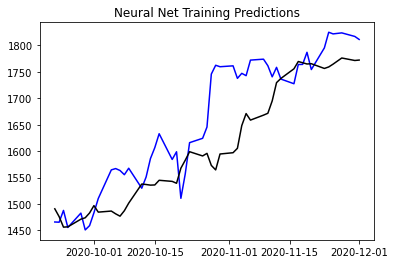

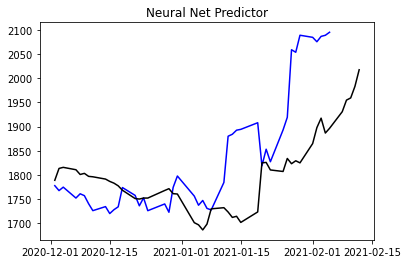


R2 Score: 0.17880378626862903


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Day,Month,Year,Days From IPO,5 Day Open Mean,5 Day High Mean,5 Day Low Mean,5 Day Close Mean,5 Day Volume Mean,5 Day Open Var,5 Day High Var,5 Day Low Var,5 Day Close Var,5 Day Volume Var,10 Day Open Mean,10 Day High Mean,10 Day Low Mean,10 Day Close Mean,10 Day Volume Mean,10 Day Open Var,10 Day High Var,10 Day Low Var,10 Day Close Var,10 Day Volume Var,20 Day Open Mean,20 Day High Mean,20 Day Low Mean,20 Day Close Mean,20 Day Volume Mean,20 Day Open Var,20 Day High Var,20 Day Low Var,20 Day Close Var,20 Day Volume Var,Close in 5 Days
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,44659096,0,0.0,19,8,2004,0,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,54.009010
2004-08-20,50.555557,54.594597,50.300301,54.209209,22834343,0,0.0,20,8,2004,1,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,53.128128
2004-08-23,55.430431,56.796799,54.579578,54.754753,18256126,0,0.0,23,8,2004,4,50.302803,53.338339,49.164164,52.214714,3.374672e+07,0.063885,1.578184,1.290807,3.978012,1.190800e+14,50.302803,53.338339,49.164164,52.214714,3.374672e+07,0.063885,1.578184,1.290807,3.978012,1.190800e+14,50.302803,53.338339,49.164164,52.214714,3.374672e+07,0.063885,1.578184,1.290807,3.978012,1.190800e+14,51.056057
2004-08-24,55.675674,55.855858,51.836838,52.487488,15247337,0,0.0,24,8,2004,5,52.012012,54.491159,50.969302,53.061394,2.858319e+07,5.885384,3.710110,7.377587,4.085741,1.327107e+14,52.012012,54.491159,50.969302,53.061394,2.858319e+07,5.885384,3.710110,7.377587,4.085741,1.327107e+14,52.012012,54.491159,50.969302,53.061394,2.858319e+07,5.885384,3.710110,7.377587,4.085741,1.327107e+14,51.236237
2004-08-25,52.532532,54.054054,51.991993,53.053055,9188602,0,0.0,25,8,2004,6,52.848849,54.676678,51.347347,52.944945,2.203710e+07,6.962009,3.252927,5.804171,3.129715,1.844677e+14,52.927928,54.832334,51.186186,52.917917,2.524923e+07,6.930741,3.131784,5.674306,3.126062,1.328790e+14,52.927928,54.832334,51.186186,52.917917,2.524923e+07,6.930741,3.131784,5.674306,3.126062,1.328790e+14,50.175175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-08,2100.000000,2115.000000,2063.350098,2084.520020,1441400,0,0.0,8,2,2021,6017,2039.784058,2067.246021,2013.674023,2040.995972,2.714320e+06,5289.856308,4638.269884,3940.132553,4878.912033,2.078788e+12,1946.943030,1978.352014,1921.893018,1950.549963,2.627200e+06,12203.475007,11198.457820,11579.918783,11945.639675,1.363051e+12,1873.212012,1903.460504,1850.998004,1877.026990,2.304030e+06,14146.958495,13942.800340,13113.633796,13963.644669,9.791607e+11,NaN
2021-02-09,2074.800049,2098.510010,2070.000000,2075.389893,1094600,0,0.0,9,2,2021,6018,2072.118066,2097.074023,2046.400024,2072.249951,2.269920e+06,279.213794,296.802601,516.008914,240.195023,2.397112e+12,1965.824036,1996.628015,1941.280017,1967.293958,2.579350e+06,13210.943948,11996.103333,13366.904051,13164.154506,1.498033e+12,1888.101013,1919.167004,1866.891003,1892.981982,2.271730e+06,15565.442182,14939.129884,14857.698195,14999.391728,1.038340e+12,NaN
2021-02-10,2083.139893,2098.879883,2052.239990,2086.479980,1255100,0,0.0,10,2,2021,6019,2075.624023,2095.525977,2054.138013,2077.769971,1.542120e+06,283.630906,271.840346,179.909411,208.040505,2.708807e+11,1986.647021,2018.469006,1966.776013,1994.047961,2.292300e+06,13340.020307,11128.599353,

In [181]:
googl_df = googl.history(period='max')
googl_df = pf.date_time_prep(googl_df)
googl_df = pf.rolling_aves(googl_df)
googl_df = pf.future_close_setup(googl_df, 5)
neural_net(googl_df)

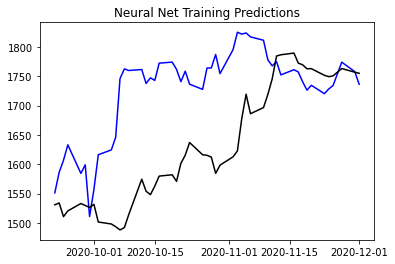

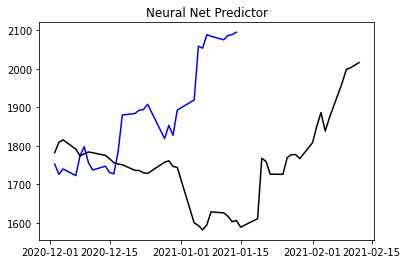


R2 Score: -2.860690106218297


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Day,Month,Year,Days From IPO,5 Day Open Mean,5 Day High Mean,5 Day Low Mean,5 Day Close Mean,5 Day Volume Mean,5 Day Open Var,5 Day High Var,5 Day Low Var,5 Day Close Var,5 Day Volume Var,10 Day Open Mean,10 Day High Mean,10 Day Low Mean,10 Day Close Mean,10 Day Volume Mean,10 Day Open Var,10 Day High Var,10 Day Low Var,10 Day Close Var,10 Day Volume Var,20 Day Open Mean,20 Day High Mean,20 Day Low Mean,20 Day Close Mean,20 Day Volume Mean,20 Day Open Var,20 Day High Var,20 Day Low Var,20 Day Close Var,20 Day Volume Var,Close in 20 Days
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,44659096,0,0.0,19,8,2004,0,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,58.803802
2004-08-20,50.555557,54.594597,50.300301,54.209209,22834343,0,0.0,20,8,2004,1,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,50.050049,52.082081,48.028027,50.220219,4.465910e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,59.739738
2004-08-23,55.430431,56.796799,54.579578,54.754753,18256126,0,0.0,23,8,2004,4,50.302803,53.338339,49.164164,52.214714,3.374672e+07,0.063885,1.578184,1.290807,3.978012,1.190800e+14,50.302803,53.338339,49.164164,52.214714,3.374672e+07,0.063885,1.578184,1.290807,3.978012,1.190800e+14,50.302803,53.338339,49.164164,52.214714,3.374672e+07,0.063885,1.578184,1.290807,3.978012,1.190800e+14,58.978977
2004-08-24,55.675674,55.855858,51.836838,52.487488,15247337,0,0.0,24,8,2004,5,52.012012,54.491159,50.969302,53.061394,2.858319e+07,5.885384,3.710110,7.377587,4.085741,1.327107e+14,52.012012,54.491159,50.969302,53.061394,2.858319e+07,5.885384,3.710110,7.377587,4.085741,1.327107e+14,52.012012,54.491159,50.969302,53.061394,2.858319e+07,5.885384,3.710110,7.377587,4.085741,1.327107e+14,59.249249
2004-08-25,52.532532,54.054054,51.991993,53.053055,9188602,0,0.0,25,8,2004,6,52.848849,54.676678,51.347347,52.944945,2.203710e+07,6.962009,3.252927,5.804171,3.129715,1.844677e+14,52.927928,54.832334,51.186186,52.917917,2.524923e+07,6.930741,3.131784,5.674306,3.126062,1.328790e+14,52.927928,54.832334,51.186186,52.917917,2.524923e+07,6.930741,3.131784,5.674306,3.126062,1.328790e+14,60.470470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-08,2100.000000,2115.000000,2063.350098,2084.520020,1441400,0,0.0,8,2,2021,6017,2039.784058,2067.246021,2013.674023,2040.995972,2.714320e+06,5289.856308,4638.269884,3940.132553,4878.912033,2.078788e+12,1946.943030,1978.352014,1921.893018,1950.549963,2.627200e+06,12203.475007,11198.457820,11579.918783,11945.639675,1.363051e+12,1873.212012,1903.460504,1850.998004,1877.026990,2.304030e+06,14146.958495,13942.800340,13113.633796,13963.644669,9.791607e+11,NaN
2021-02-09,2074.800049,2098.510010,2070.000000,2075.389893,1094600,0,0.0,9,2,2021,6018,2072.118066,2097.074023,2046.400024,2072.249951,2.269920e+06,279.213794,296.802601,516.008914,240.195023,2.397112e+12,1965.824036,1996.628015,1941.280017,1967.293958,2.579350e+06,13210.943948,11996.103333,13366.904051,13164.154506,1.498033e+12,1888.101013,1919.167004,1866.891003,1892.981982,2.271730e+06,15565.442182,14939.129884,14857.698195,14999.391728,1.038340e+12,NaN
2021-02-10,2083.139893,2098.879883,2052.239990,2086.479980,1255100,0,0.0,10,2,2021,6019,2075.624023,2095.525977,2054.138013,2077.769971,1.542120e+06,283.630906,271.840346,179.909411,208.040505,2.708807e+11,1986.647021,2018.469006,1966.776013,1994.047961,2.292300e+06,13340.020307,11128.599353

In [182]:
googl_df = googl.history(period='max')
googl_df = pf.date_time_prep(googl_df)
googl_df = pf.rolling_aves(googl_df)
googl_df = pf.future_close_setup(googl_df, 20)
neural_net(googl_df)